**Convolutional Neural Networks (CNN):**

- **Convolutional Layers**: Extract local features using convolution operations.
- **Pooling Layers**: Down-sample spatial dimensions to reduce computational complexity.
- **Fully Connected Layers**: Map extracted features to output predictions.

The core mathematical operation is convolution, defined as:
$$
y[i, j] = \sum_{m=-k}^k \sum_{n=-k}^k x[i+m, j+n] \cdot w[m, n]
$$
where \( x \) is the input, \( w \) is the filter (kernel), and \( y \) is the output.
""")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.3556 - loss: 1.7528 - val_accuracy: 0.5661 - val_loss: 1.2215
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.5949 - loss: 1.1496 - val_accuracy: 0.6123 - val_loss: 1.0967
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.6576 - loss: 0.9703 - val_accuracy: 0.6803 - val_loss: 0.9357
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.7061 - loss: 0.8450 - val_accuracy: 0.6782 - val_loss: 0.9342
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 106ms/step - accuracy: 0.7367 - loss: 0.7545 - val_accuracy: 0.7031 - val_loss: 0.8705
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.7652 - loss: 0.6750 - val_accuracy: 0.7265 - val_loss: 0.8050
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.7929 - loss: 0.5982 - val_accuracy: 0.7325 - val_loss: 0.7930
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 94ms/step - accuracy: 0.8099 - loss: 0.5407 -

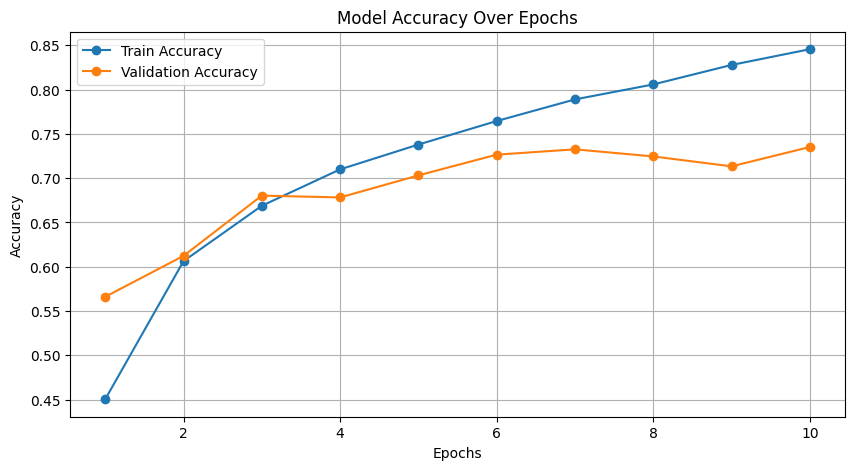

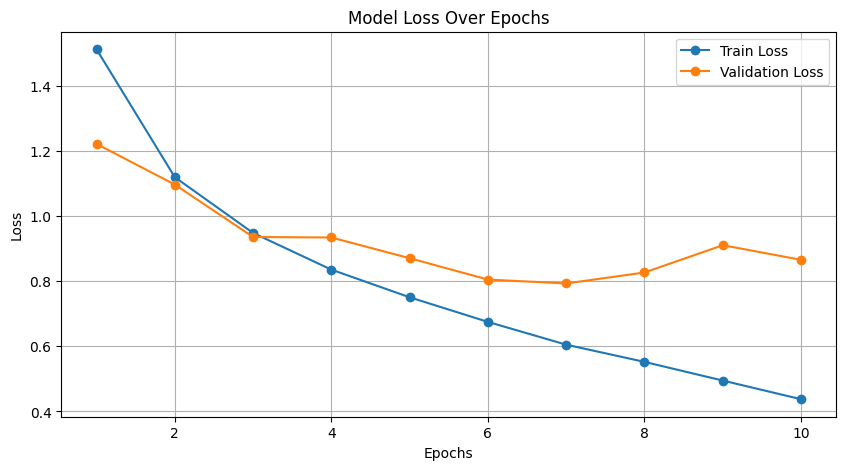

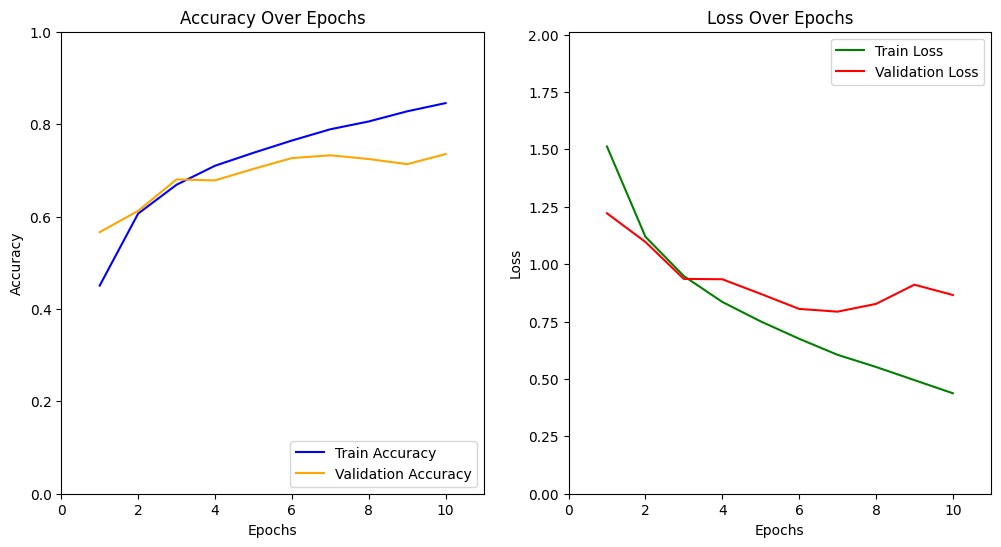

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

history_data = model.history.history

epochs = range(1, len(history_data['accuracy']) + 1)
train_acc = history_data['accuracy']
val_acc = history_data['val_accuracy']
train_loss = history_data['loss']
val_loss = history_data['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.set_xlim(0, len(epochs) + 1)
ax1.set_ylim(0, 1.0)
ax1.set_title('Accuracy Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax2.set_xlim(0, len(epochs) + 1)
ax2.set_ylim(0, max(max(train_loss), max(val_loss)) + 0.5)
ax2.set_title('Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

line1, = ax1.plot([], [], label='Train Accuracy', color='blue')
line2, = ax1.plot([], [], label='Validation Accuracy', color='orange')
line3, = ax2.plot([], [], label='Train Loss', color='green')
line4, = ax2.plot([], [], label='Validation Loss', color='red')

ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

def update(epoch):
    line1.set_data(epochs[:epoch], train_acc[:epoch])
    line2.set_data(epochs[:epoch], val_acc[:epoch])
    line3.set_data(epochs[:epoch], train_loss[:epoch])
    line4.set_data(epochs[:epoch], val_loss[:epoch])
    return line1, line2, line3, line4

ani = animation.FuncAnimation(fig, update, frames=len(epochs)+1, interval=500, blit=True)

ani.save("training_animation_dynamic.gif", writer="imagemagick")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


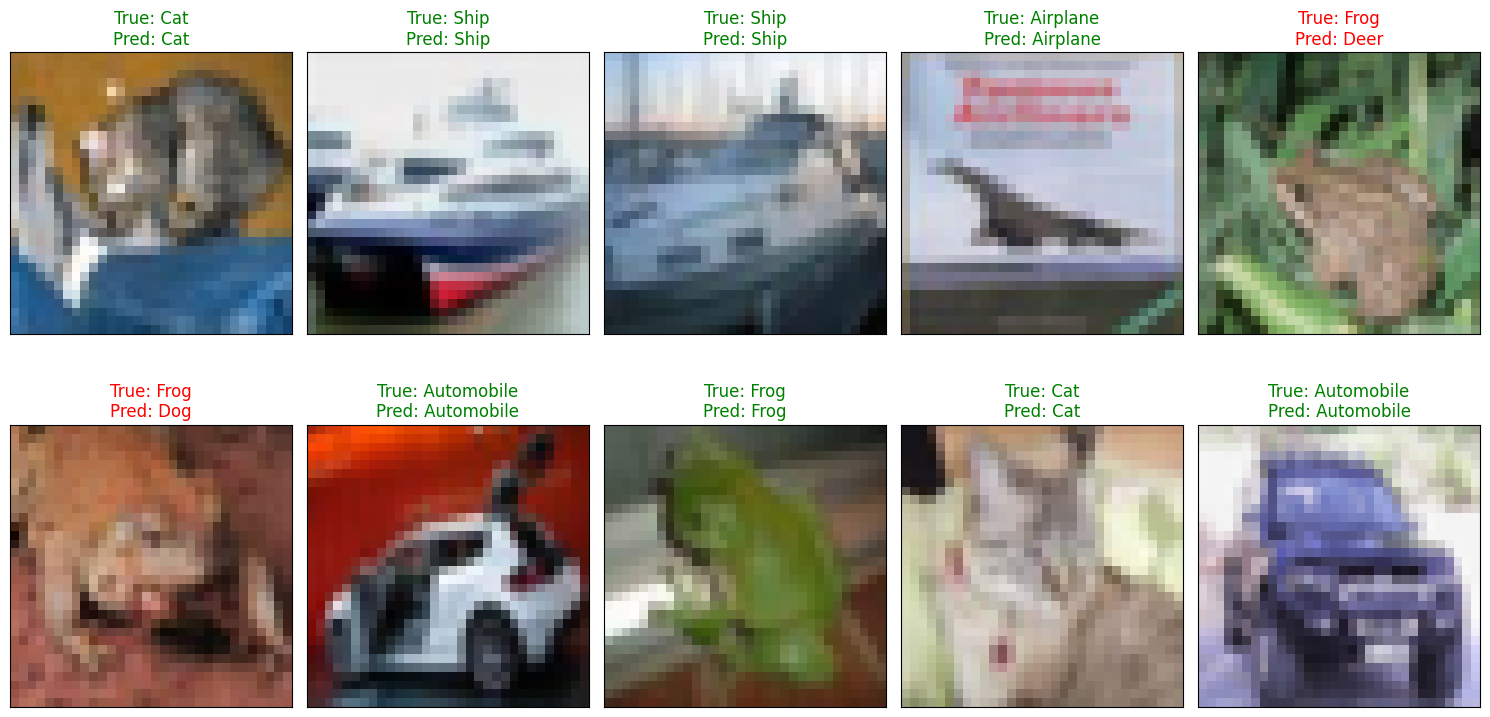

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Normalize input data
x_test = x_test / 255.0

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

def plot_images(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}", color=color)
    plt.tight_layout()
    plt.show()

plot_images(x_test[:10], true_classes[:10], predicted_classes[:10], class_names)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


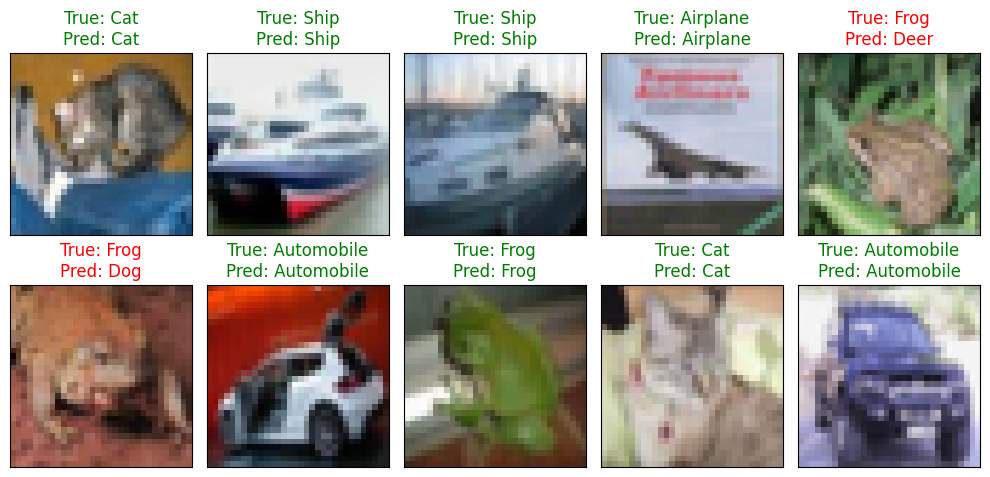

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Normalize input data
x_test = x_test / 255.0

# Predict on the test set using your pre-trained model
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

# Improved visualization function
def plot_images_with_interpolation(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(10, 5))  # Smaller figure size for clarity
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], interpolation='nearest')  # Use nearest neighbor interpolation
        plt.xticks([])
        plt.yticks([])
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}", color=color)
    plt.tight_layout()
    plt.show()

# Plot test images with predictions using the improved visualization
plot_images_with_interpolation(x_test[:10], true_classes[:10], predicted_classes[:10], class_names)

## A convolution operation
A convolution operation applies a kernel (filter) over an input image or feature map. Mathematically, it is expressed as:
$$
y[i, j] = \sum_{m=-k}^k \sum_{n=-k}^k x[i+m, j+n] \cdot w[m, n]
$$
where:
- \( x[i, j] \): Input pixel at position \((i, j)\).
- \( w[m, n] \): Filter values (kernel weights).
- \( y[i, j] \): Output pixel at position \((i, j)\).



In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Input matrix (image)
input_image = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

display(input_image)

# Kernel (filter)
kernel = np.array([[1, 0], [0, -1]])

print("Kernel:")
display(kernel)


# Apply convolution
output = convolve2d(input_image, kernel, mode='valid')
print("Output")
print(output)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Kernel:


array([[ 1,  0],
       [ 0, -1]])

Output
[[4 4]
 [4 4]]


1D Convolution Result: [0.  1.  2.5 4.  1.5]


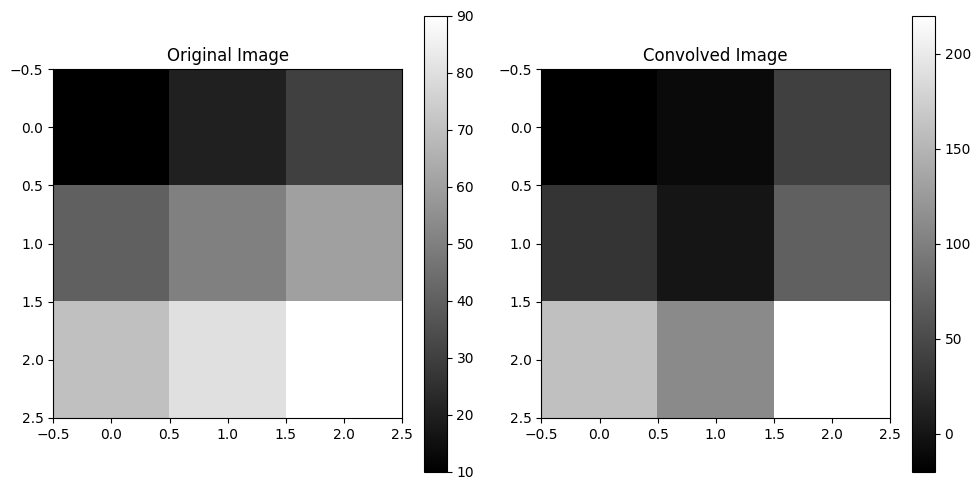

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

# 1D Convolution (Numerical Example)
h = [1, 2, 3]  # Example sequence 1
k = [0, 1, 0.5]  # Example sequence 2

# Perform 1D convolution manually
def manual_convolution(h, k):
    h_len, k_len = len(h), len(k)
    result_len = h_len + k_len - 1
    result = np.zeros(result_len)
    for i in range(result_len):
        for j in range(k_len):
            if 0 <= i - j < h_len:  # Ensure index is valid
                result[i] += h[i - j] * k[j]
    return result

conv_result = manual_convolution(h, k)
print("1D Convolution Result:", conv_result)

# 2D Convolution (Image Example)
# Create a sample image
image = np.array([[10, 20, 30],
                  [40, 50, 60],
                  [70, 80, 90]])

# Create a simple kernel
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

# Perform 2D convolution
convolved_image = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

# Plot the original image and the convolved image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(convolved_image, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()


# Pooling
Pooling is a down-sampling operation to reduce the dimensions of feature maps. The most common methods are:
- **Max Pooling**: Takes the maximum value in a defined region.
- **Average Pooling**: Takes the average value in a defined region.

For a \( k \times k \) region in the feature map, max pooling is defined as:
$$
y[i, j] = \max_{m=0}^{k-1} \max_{n=0}^{k-1} x[i+m, j+n]
$$


In [ ]:
from tensorflow.keras.layers import MaxPooling2D
import numpy as np

# Input feature map
input_map = np.random.rand(1, 4, 4, 1)

# Max pooling layer
pooling_layer = MaxPooling2D(pool_size=(2, 2))
pooled_output = pooling_layer(input_map)
print(pooled_output.numpy())

[[[[0.8540184 ]
   [0.85940534]]

  [[0.8102901 ]
   [0.7580648 ]]]]


In [ ]:
from IPython.display import display, Math, Markdown